In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import chi2, SelectKBest, SelectFdr
from sklearn.decomposition import PCA
from rake_nltk import Rake

Import data as data frame

In [2]:
# dataPath = "/mnt/c/Users/LJUDY/OneDrive/MyStuff/Work/FedEx/Shift Lead/Clustering Project/"
simplefile = "problems_preprocessed.csv"

data = pd.read_csv(simplefile)
data.head()

,Assignment group,Business duration,Business service,Category,Company,Created Time,Created by,Duration Mean,Has Parent,Impact,Major Problem,Opened by,Priority,Problem Manager,Reassignment count,Related Incidents,Type,Updates,Urgency
0,Other,0,Network,Application,FedEx Services,night,Other,1.701900e+04,True,3,True,Sean Green,5,Randall Painter,2,1,ITCC,10,3
1,Other,0,Server,Hardware,FedEx Services,afternoon,ID973921,8.944533e+04,False,3,True,Stephen Barch,4,Randall Painter,2,2,ITCC,15,2
2,FXS_EIS_GLB_ProblemMgmt,0,Server,Other,Other,afternoon,ID5069733,0.000000e+00,False,3,False,Admin-Arturo Reyes,5,Other,0,0,Other,2,3
3,Other,432000,Computer,Application,FedEx Freight Inc.,morning,Other,9.125320e+05,True,3,True,David Light,5,Eli Smith,2,1,ITCC,10,3
4,FSC_L3WMSSTERLINGLOFT,2157802,Computer,Application,Other,afternoon,ID5069733,9.069802e+06,False,2,False,Admin-Arturo Reyes,3,Naveen Kumar,0,0,Standard,6,2


In [ ]:
data.columns

## Exploratory Data Analysis

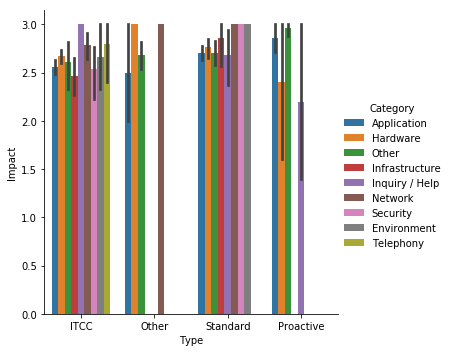

In [3]:
seaborn.catplot(x="Type", y="Impact", hue="Category", kind="bar", data=data);

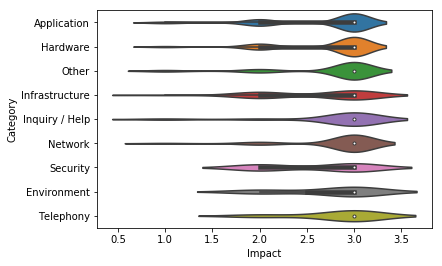

In [4]:
seaborn.violinplot(y='Category',x='Impact',data=data)

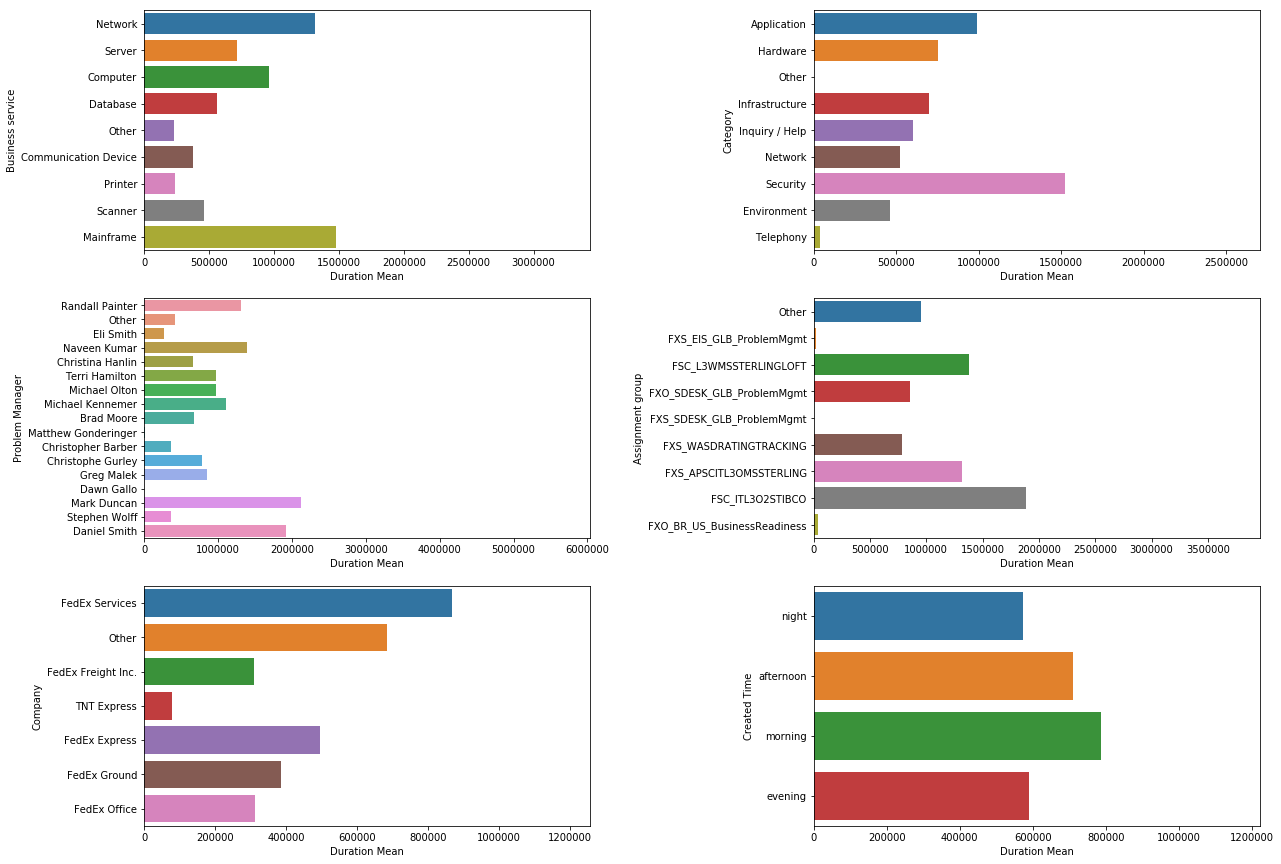

In [5]:
fig, ax = plt.subplots(3,2)
plt.subplots_adjust(wspace=.5, hspace=.2)
fig.set_figwidth(20)
fig.set_figheight(15)
seaborn.barplot('Duration Mean', 'Business service', errwidth=0, data=data, ax=ax[0,0])
seaborn.barplot('Duration Mean', 'Category', errwidth=0, data=data, ax=ax[0,1])
seaborn.barplot('Duration Mean', 'Problem Manager', errwidth=0, data=data, ax=ax[1,0])
seaborn.barplot('Duration Mean', 'Assignment group', errwidth=0, data=data, ax=ax[1,1])
seaborn.barplot('Duration Mean', 'Company', errwidth=0, data=data, ax=ax[2,0])
seaborn.barplot('Duration Mean', 'Created Time', errwidth=0, data=data, ax=ax[2,1])

In [ ]:
fig, ax = plt.subplots(3,2)
plt.subplots_adjust(wspace=.5, hspace=.2)
fig.set_figwidth(20)
fig.set_figheight(15)
seaborn.set_style("dark")
seaborn.violinplot('Priority', 'Business service', errwidth=0, data=data, ax=ax[0,0])
seaborn.violinplot('Priority', 'Category', errwidth=0, data=data, ax=ax[0,1])
seaborn.violinplot('Priority', 'Problem Manager', errwidth=0, data=data, ax=ax[1,0])
seaborn.violinplot('Priority', 'Assignment group', errwidth=0, data=data, ax=ax[1,1])
seaborn.violinplot('Priority', 'Company', errwidth=0, data=data, ax=ax[2,0])
seaborn.violinplot('Priority', 'Created Time', errwidth=0, data=data, ax=ax[2,1])

In [ ]:
corr = data.corr()
seaborn.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)